In [35]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the dataset
df = pd.read_csv('Iris.csv')


In [36]:
# Step 3: Basic Exploration
print("🔍 First 5 rows:")
print(df.head())

print("\n📊 Info:")
print(df.info())

print("\n📈 Summary:")
print(df.describe())

🔍 First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

📊 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2

In [37]:
# Step 4: Handle Missing Values
print("\n Missing values:")
print(df.isnull().sum())
df.dropna(inplace=True)  # Drop rows with missing values (or use imputation if needed)


 Missing values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [38]:
# Step 5: Handle Duplicates
print("\n📦 Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


📦 Duplicate rows: 0


In [39]:
# Step 6: Handle Inconsistencies
# Example: Fix inconsistent species labels (if any)
df['Species'] = df['Species'].str.strip().str.lower()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib as plt

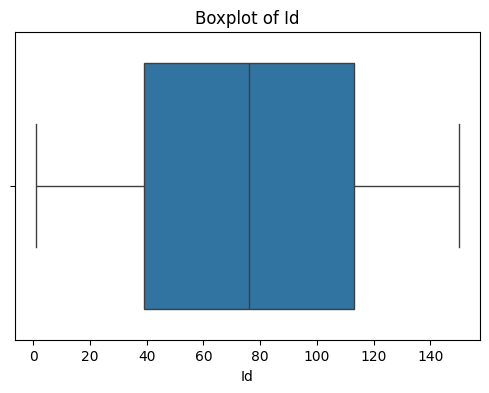

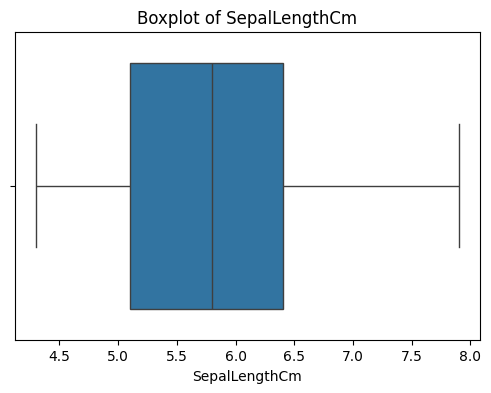

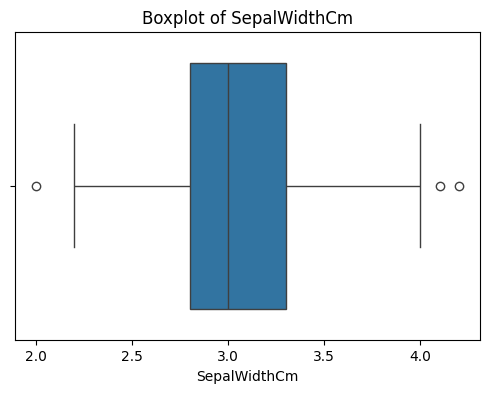

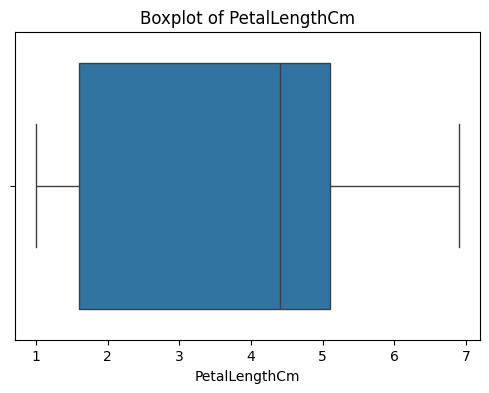

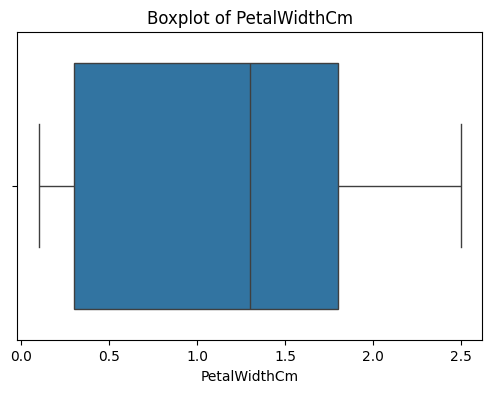

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [51]:
# Step 7: Handle Outliers (Z-score method)
numeric_cols = df.select_dtypes(include=np.number).columns
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
df = df[(z_scores < 3).all(axis=1)]  # Keep rows where all z-scores < 3

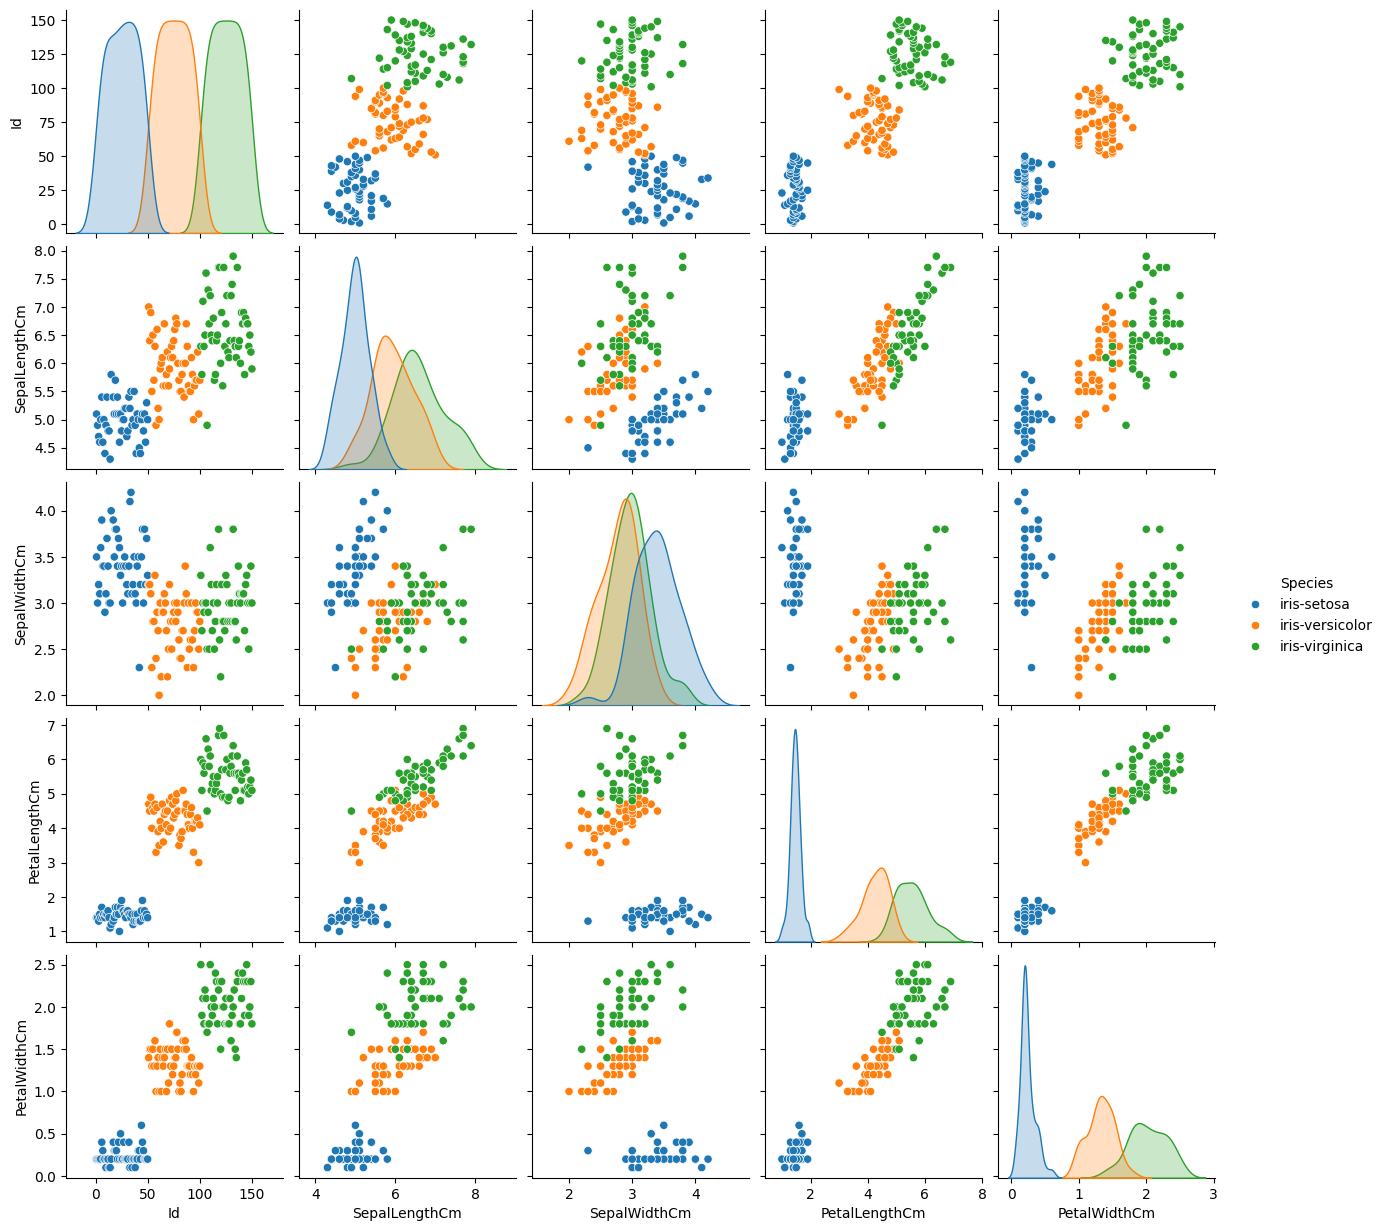

In [43]:
# Step 8: Visualize cleaned data
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Species')  
plt.show()


In [44]:
# Correct preprocessing
X = df.drop('Species', axis=1)
y = df['Species']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # ✅ only 4 features


In [45]:
# Step 10: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [46]:
# Step 11: Train kNN Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [47]:
# Step 12: Evaluate Model
y_pred = knn.predict(X_test)
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))



✅ Accuracy: 1.0


In [49]:
# 🔍 Predict on test data
y_test_pred = knn.predict(X_test)

# ✅ Show accuracy
print("✅ Accuracy on Test Data:", accuracy_score(y_test, y_test_pred))

# 📋 Show predictions alongside actual labels
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print("\n🔍 Prediction Results:")
print(results_df.head(10))  # Show first 10 predictions


✅ Accuracy on Test Data: 1.0

🔍 Prediction Results:
              Actual        Predicted
74   iris-versicolor  iris-versicolor
19       iris-setosa      iris-setosa
118   iris-virginica   iris-virginica
79   iris-versicolor  iris-versicolor
77   iris-versicolor  iris-versicolor
32       iris-setosa      iris-setosa
65   iris-versicolor  iris-versicolor
141   iris-virginica   iris-virginica
69   iris-versicolor  iris-versicolor
83   iris-versicolor  iris-versicolor


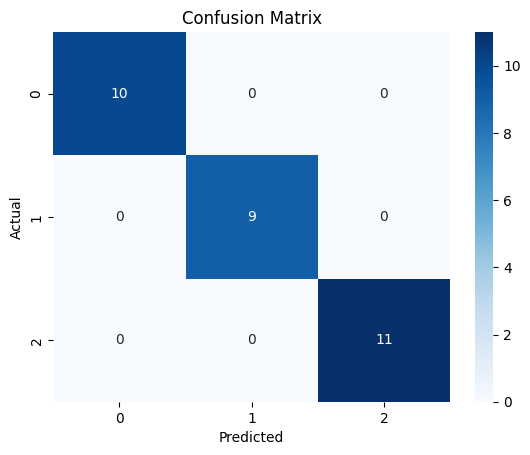

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
